# K-Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset.head()

,Phase,Beamline,Year,Filename,Sample,Support,Temperature,He,H2,C2H2,C2H4,CH4,O2,Air,C7H12,Amp_ref,Amp_ref_error,Amp_spec,N_Pd-Pd,N_Pd-Pd_error,del_E0_Pd-Pd,del_E0_Pd-Pd_error,sigma2_Pd-Pd,sigma2_Pd-Pd_error,R_Pd-Pd,R_Pd-Pd_error,N_Pd-O,N_Pd-O_error,del_E0_Pd-O,del_E0_Pd-O_error,sigma2_Pd-O,sigma2_Pd-O_error,R_Pd-O,R_Pd-O_error,Oxide_fraction,Oxide_fraction_error,Time,24350.00000000,24351.00000000,24352.00000000,...,24860.00000000,24861.00000000,24862.00000000,24863.00000000,24864.00000000,24865.00000000,24866.00000000,24867.00000000,24868.00000000,24869.00000000,24870.00000000,24871.00000000,24872.00000000,24873.00000000,24874.00000000,24875.00000000,24876.00000000,24877.00000000,24878.00000000,24879.00000000,24880.00000000,24881.00000000,24882.00000000,24883.00000000,24884.00000000,24885.00000000,24886.00000000,24887.00000000,24888.00000000,24889.00000000,24890.00000000,24891.00000000,24892.00000000,24893.00000000,24894.00000000,24895.00000000,24896.00000000,24897.00000000,24898.00000000,24899.00000000
0,Metal,ESRF_BM01B,2013,PdAl2O3_t150_p0000.dat,Pd_Al2O3,Al2O3,150.001742,1,0,0,0,0,0,0,0,0.7772479783333334,0.029533053333333333,0.765,11.547963,0.413643,-0.822899,0.258431,0.009165,0.000313,2.727286,0.002374,None,None,None,None,None,None,None,None,None,None,Mar 07 05:15:13 2013,0.494983,0.535521,0.577256,...,1.000476,0.999852,0.999077,0.998357,0.999570,1.001050,1.001331,1.000537,1.001654,1.001578,0.999352,0.999931,1.001242,1.001482,1.001672,1.001988,1.003046,1.001113,1.002231,1.002893,1.002822,1.005076,1.001956,1.002686,1.003824,1.003218,1.003474,1.005784,1.004683,1.002872,1.001847,1.002917,1.002408,1.002241,1.004205,1.003715,1.002773,1.002461,1.002427,1.003738
1,Metal,ESRF_BM01B,2014,Pd_black_020C_0000.dat,Pd_black,C,20.000000,1,0,0,0,0,0,0,0,0.6002093958333333,0.36472929916666663,0.870,8.616026,0.598721,3.397523,0.522553,0.005529,0.000425,2.737821,0.003535,None,None,None,None,None,None,None,None,None,None,Oct 06 04:11:49 2014,0.395176,0.441097,0.484324,...,0.998170,0.998640,0.998797,0.999305,0.999757,1.000292,1.000694,1.001102,1.001525,1.001727,1.002107,1.002698,1.002937,1.003168,1.003453,1.003658,1.003988,1.004300,1.004520,1.004709,1.004953,1.005081,1.005304,1.005657,1.005733,1.005852,1.006057,1.006240,1.006367,1.006382,1.006445,1.006609,1.006620,1.006559,1.006626,1.006670,1.006599,1.006503,1.006461,1.006423
2,Metal,ESRF_BM01B,2014,Pd_black_020C_0000_1.dat,Pd_black,C,20.000000,1,0,0,0,0,0,0,0,0.5365603608333334,0.38519106,0.870,8.582757,0.414078,3.220090,0.362798,0.005543,0.000295,2.737898,0.002456,None,None,None,None,None,None,None,None,None,None,Oct 06 04:34:43 2014,0.403509,0.449920,0.493394,...,0.998277,0.998733,0.999108,0.999304,0.999718,1.000393,1.000714,1.001079,1.001420,1.001884,1.002309,1.002554,1.002831,1.003144,1.003400,1.003609,1.003985,1.004207,1.004547,1.004725,1.004895,1.005179,1.005251,1.005354,1.005505,1.005810,1.006076,1.006255,1.006262,1.006283,1.006298,1.006405,1.006379,1.006478,1.006580,1.006845,1.006419,1.006576,1.006127,1.006278
3,Metal,ESRF_BM01B,2014,Pd_black_020C_0000_2.dat,Pd_black,C,20.000000,1,0,0,0,0,0,0,0,0.5608846858333333,0.2975189,0.870,8.566006,0.379948,3.550012,0.333484,0.005528,0.000271,2.738000,0.002257,None,None,None,None,None,None,None,None,None,None,Oct 06 04:50:08 2014,0.389719,0.435295,0.479329,...,0.998214,0.998563,0.998987,0.999355,0.999868,1.000103,1.000730,1.001108,1.001520,1.001753,1.002232,1.002637,1.002857,1.003133,1.003220,1.003503,1.003824,1.004274,1.004473,1.004765,1.004833,1.005152,1.005318,1.005465,1.005599,1.005904,1.006080,1.006157,1.006200,1.006322,1.006400,1.006446,1.006436,1.006499,1.006432,1.006518,1.006542,1.006448,1.006387,1.006359
4,Metal,ESRF_BM01B,2014,Pd_cel_020C_0000_1.dat,Pd_cel,C,20.000000,1,0,0,0,0,0,0,0,0.8481559916666667,0.08133738333333333,0.870,10.920802,0.392952,0.101207,0.269946,0.006044,0.000230,2.736960,0.001909,None,None,None,None,None,None,None,None,None,None,Oct 06 23:21:02 2014,0.495504,0.535257,0.575953,...,1.000087,1.000464,1.000740,1.00150

In [ ]:
dataset = pd.read_csv('total_Metal.csv')
X = dataset.iloc[:, [6, 586]].values

## Using the elbow method to find the optimal number of clusters

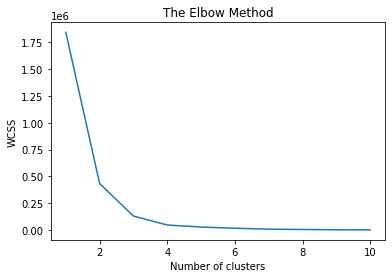

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

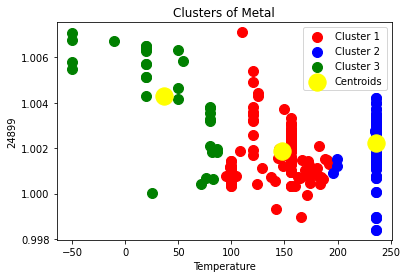

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Metal')
plt.xlabel('Temperature')
plt.ylabel('24350')
plt.legend()
plt.savefig('kmean.png', dpi=1000)
plt.show()